## 11.1. Introduction to Time Series in Pandas

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime


dates = pd.date_range(start='1/1/2021', end='6/30/2021')
print(len(dates))
print(dates)

181
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=181, freq='D')


In [2]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
date_df = pd.DataFrame(dates, columns=['Date'])
date_df['Temperature'] = np.random.randint(0,50,size=(len(dates)))
date_df.head()

,Date,Temperature
0,2021-01-01,32
1,2021-01-02,13
2,2021-01-03,8
3,2021-01-04,1
4,2021-01-05,2


In [4]:
date_df['Date'] = pd.to_datetime(date_df['Date'])
date_df = date_df.set_index('Date')

date_df.head()

,Temperature
Date,
2021-01-01,32
2021-01-02,13
2021-01-03,8
2021-01-04,1
2021-01-05,2


<AxesSubplot:xlabel='Date'>

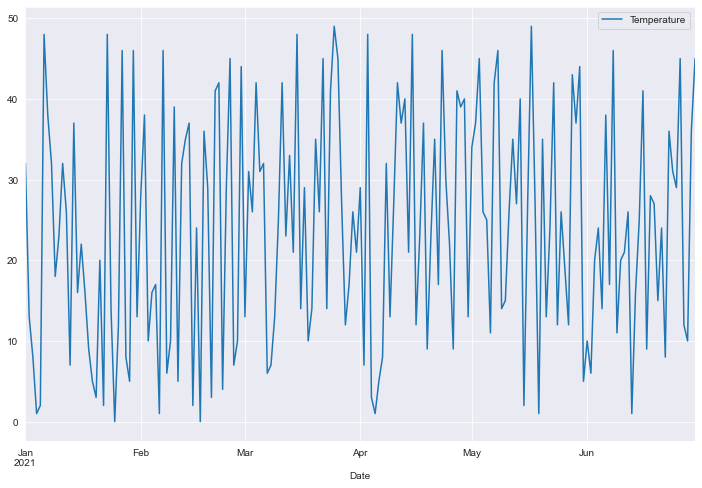

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
date_df.plot.line( y='Temperature', figsize=(12,8))

## 11.2. Time Resampling and Shifting

In [22]:
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

google_stock = pd.read_csv(r"D:Datasets\google_data.csv")
google_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
1,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
2,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
3,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300
4,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700


<AxesSubplot:xlabel='Date'>

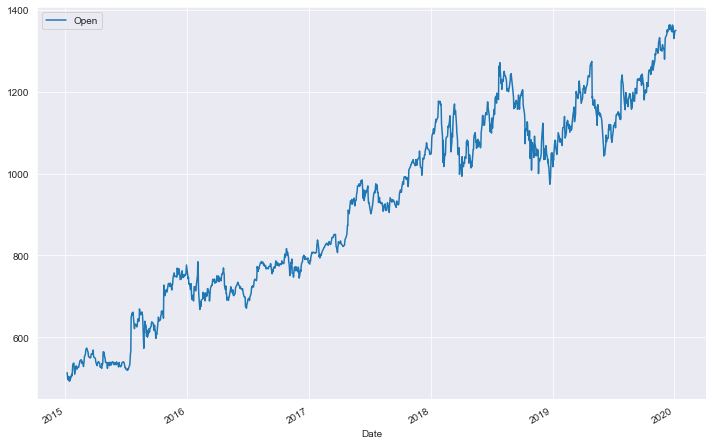

In [23]:
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)
google_stock.set_index('Date', inplace=True)
google_stock.plot.line( y='Open', figsize=(12,8))


### 11.2.1. Time Sampling

In [8]:
google_stock.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,602.676217,608.091468,596.722047,602.678382,602.678382,2.071960e+06
2016-12-31,743.732459,749.421629,737.597905,743.486707,743.486707,1.832266e+06
2017-12-31,921.121193,926.898963,915.331412,921.780837,921.780837,1.476514e+06
2018-12-31,1113.554101,1125.777606,1101.001658,1113.225134,1113.225134,1.741965e+06
2019-12-31,1187.009821,1196.787599,1178.523734,1188.393057,1188.393057,1.414085e+06
2020-12-31,1346.470011,1379.046672,1345.697998,1374.079997,1374.079997,1.441767e+06


In [9]:
google_stock.resample(rule='M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,510.388728,515.352041,503.988300,510.248006,510.248006,2.595550e+06
2015-02-28,534.448454,540.111910,530.943141,536.519088,536.519088,1.715495e+06
2015-03-31,558.825290,562.627577,554.057018,558.183871,558.183871,1.756709e+06
2015-04-30,539.966811,543.839108,535.114912,539.304467,539.304467,2.017938e+06
2015-05-31,535.470502,539.167248,530.856650,535.238998,535.238998,1.593295e+06
...,...,...,...,...,...,...
2019-09-30,1217.599005,1228.892249,1209.628491,1220.839520,1220.839520,1.344970e+06
2019-10-31,1230.809995,1242.260774,1223.923043,1232.711744,1232.711744,1.250361e+06
2019-11-30,1302.348492,1311.498956,1296.424707,1304.278992,1304.278992,1.246170e+06


In [10]:
google_stock['Open'].resample('A').mean()

Date
2015-12-31     602.676217
2016-12-31     743.732459
2017-12-31     921.121193
2018-12-31    1113.554101
2019-12-31    1187.009821
2020-12-31    1346.470011
Freq: A-DEC, Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

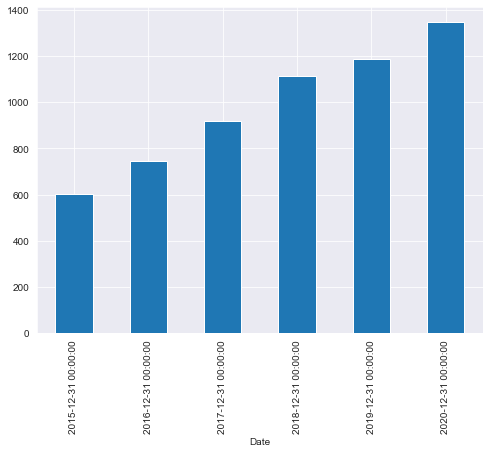

In [11]:
google_stock['Open'].resample('A').mean().plot(kind='bar', figsize=(8,6))

<AxesSubplot:xlabel='Date'>

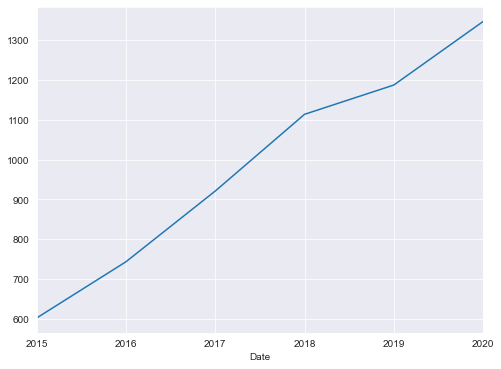

In [12]:
google_stock['Open'].resample('A').mean().plot(kind='line', figsize=(8,6))

### 11.2.2. Time Shifting

In [13]:
google_stock.shift(3).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,513.589966,514.761719,499.678131,500.585632,500.585632,2899900.0
2015-01-12,505.611847,505.855164,498.281952,499.727997,499.727997,2065000.0


In [14]:
google_stock.shift(-3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,1347.859985,1372.5,1345.543945,1360.660034,1360.660034,1186400.0
2019-12-31,1350.000000,1396.5,1350.000000,1394.209961,1394.209961,1732300.0
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN


## 11.3. Rolling Window Functions

In [15]:
google_stock = pd.read_csv(r"D:\Datasets\google_data.csv")

google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)
google_stock.set_index('Date', inplace=True)

google_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700


In [16]:
google_stock['Roll. Volumne Avg'] = google_stock['Volume'].rolling(2).mean()
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg
Date,,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,NaN
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,2482450.0
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,2709250.0
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,2712400.0
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,2199000.0


In [17]:
google_stock['Roll. Sum Avg'] = google_stock['Volume'].rolling(2).sum()
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg
Date,,,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,NaN,NaN
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,2482450.0,4964900.0
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,2709250.0,5418500.0
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,2712400.0,5424800.0
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,2199000.0,4398000.0


In [18]:
google_stock['Roll. Min Avg'] = google_stock['Volume'].rolling(3).min()
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg,Roll. Min Avg
Date,,,,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,NaN,NaN,NaN
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,2482450.0,4964900.0,NaN
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,2709250.0,5418500.0,2065000.0
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,2712400.0,5424800.0,2065000.0
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,2199000.0,4398000.0,2071300.0


In [19]:
google_stock['Roll. std Avg'] = google_stock['Volume'].rolling(3).std()
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg,Roll. Min Avg,Roll. std Avg
Date,,,,,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,NaN,NaN,NaN,NaN
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,2482450.0,4964900.0,NaN,NaN
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,2709250.0,5418500.0,2065000.0,653585.396104
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,2712400.0,5424800.0,2065000.0,742103.853918
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,2199000.0,4398000.0,2071300.0,678673.244893


## Excersise 11.1

### Question 1

In a pandas dataframe df, how would you add a column "B" which contains rolling sum of the previous 3 rows in the column "C"? 

A. df["B"] = df["C"].roll(3).sum() 

B. df["B"] = df["C"].rolling(3).add() 

C. df["B"] = df["C"].rolling(3).sum()

D. df["C"] = df["B"].rolling(3).sum()

Answer: C

### Question 2

To resample timeseries data by year, you have to use the following rule in the resample() function:

A. "Year"

B.  "Years"

C. "A" 

D. "Annual"

Answer: C

### Question 3

How to time shift pandas dataframe 5 rows back?

A. shift_back(5) \
B. shift(5) \
C. shift_behind(-5) \
D. shift(-5)

Answer: D

## Exercise 11.2 

Using the pandas dataframe, read the "titanic_data.csv" file from the data folder. Conver the "date" column to date type column and then set this column as the index column. 

Add a column in the dataframe which displays the maximum value from the "Open" column for the last 5 days. 

In [20]:
google_stock = pd.read_csv(r"D:\Datasets\google_data.csv")

google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)
google_stock.set_index('Date', inplace=True)


google_stock['Roll. Max Avg'] = google_stock['Open'].rolling(5).max()
google_stock.head(15)

,Open,High,Low,Close,Adj Close,Volume,Roll. Max Avg
Date,,,,,,,
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,NaN
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,NaN
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,NaN
2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,NaN
2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,513.589966
2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,505.611847
2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,503.377991
2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,504.185760
2015-01-16,498.640991,506.798584,498.631012,506.688873,506.688873,2298200,504.185760
